# Connect 4 sur un SenseHat
---

## Introduction

### Règles du Jeu

Le Connect 4, Four in a Row, ou Puissance 4 en français est un jeu se déroulant sur une grille de 6 rangées et 7 colonnes. En insérant tour à tour un jeton coloré dans la dernière rangée, qui tombe ensuite dans le plus bas emplacement disponible, les joueurs tentent d'avoir quatre jetons de leur couleur alignés horizontalement, verticalement, ou diagonalement.
Si toutes les cases sont remplies sans gagnant, la partie est déclarée nulle. 

### Mise en place sur SenseHat

L'écran du SenseHat étant fait de 8\*8 pixels, il a été décidé d'utiliser cette surface de la manière suivante :
- Une **zone de jeu**, de 6*7 pixels bleus
- Un espace de sélection, avec un **curseur** de la couleur du joueur en train de jouer


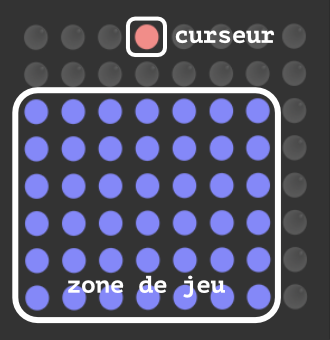

## Installation

### 1. Importer SenseHat & autres modules

La première étape de la programmation de ce jeu est l'importation du module Sense_Hat afin de pouvoir communiquer avec le SenseHat.

In [ ]:
from sense_hat import SenseHat
#from sense_emu import SenseHat
from time import sleep, time
from gamelib import *

sense = SenseHat()

```from sense_hat import SenseHat``` permet l'intéraction avec le module SenseHat. <br/>
```#from sense_emu import SenseHat``` permet d'utiliser l'émulateur SenseHat si la ligne est décommentée <br/>
```from time import sleep, time``` permet d'utiliser la fonction sleep(time) afin de pouvoir ralentir le programme <br/>
```from gamelib import *``` importe les couleurs de ```gamelib``` <br/>
<br/>
```sense = SenseHat()``` permet d'appeler les fonctions liées au SenseHat. 

### 2. Définir et initialiser les variables générales

Ces variables seront cruciales au bon fonctionnement du jeu. 




In [ ]:
repeat = 1  # Repeats the program if launched as standalone
playerScore = [0, 0]  # Score of the players
turns = 0  # Amount of turns passed
gameOver = 0  # Is the game over?
stopGame = 0  # =1 makes main() stop the game

# Creates two lists of 4 pixels to make winning streaks detection easier
fourYellow = [[248, 252, 0]] * 4
fourRed = [[248, 0, 0]] * 4

# Puts BLUE, RED and YELLOW from gamelib into a list
colors = (BLUE, RED, YELLOW)

### 3. Fonction ```main()```

La fonction ```main()``` est la fonction principale du jeu, qui le fait démarrer, continuer, où l'arrête.

In [ ]:
def main():
    """
    Main function, initialises the game, starts it, and stops it when needed.
    """
    global gameOver
    global playerScore
    global stopGame
    global turns
    turns = 0  # Resets the turns passed
    # Stops the game if a player has 2 points or if stop_game() set
    # stopGame to 1 and the game is supposed to stop now
    if (
        repeat == 0 and
        (playerScore[0] == 2 or playerScore[1] == 2 or stopGame == 1)
    ):
        stopGame = 0  # Resets stopGame
        gameOver = 0  # Resets gameOver
        return
    # If the game should continue, resets gameOver and playerScore to 0
    else:
        gameOver = 0  # Resets gameOver
        if playerScore[0] == 2 or playerScore[1] == 2 or stopGame == 1:
            stopGame = 0  # Resets stopGame
            playerScore = [0, 0]  # Resets the playerScore
        show()  # Resets the display for a new game
        turn()  # Starts a new turn

Le morceau de code <br/>
```
if (
        repeat == 0 and
        (playerScore[0] == 2 or playerScore[1] == 2 or stopGame == 1)
    ):
```
est indenté spécialement pour suivre le standard PEP8 tout en ne faisant pas plus de 79 caractères de long.

La fonction ```main()``` appèle les fonctions ```show()``` et ```turn()```, décrites ci-dessous en sections 4. et 5.

### 4. Fonction ```show()```
La fonction ```show()``` réinitialise l'affichage, puis y créé la zone de jeu en bleu de 6\*7 pixels.

In [ ]:
def show():
    """
    Sets up the playing field : 6*7 blue pixels
    """
    sense.clear()  # Resets the pixels
    # Creates the 6*7 blue playing field
    for y in range(6):
        for x in range(7):
            sense.set_pixel(x, 7-y, colors[0])

### 5. Fonction ```turn()```
La fonction ```turn()``` gère les tours, appèle la fonction ```select_column(p)``` pour que le joueur `p` sélectionne où placer son jeton, et cause un match nul si toutes les cases sont pleines (42 tours écoulés). 

In [ ]:
def turn():
    """
    Decides whose turn it is, then calls select_column(p) to allow the player p
    to make their selection
    """
    global turns
    if gameOver == 0:  # Checks that the game isn't over
        if turns % 2 == 0 and turns != 42:  # If the turn is even it's p1's
            turns += 1  # Increments turns
            select_column(1)  # Asks p1 to select a column for their token
        elif turns % 2 == 1 and turns != 42:  # If the turn is odd, it's p2's
            turns += 1  # Increments turns
            select_column(2)  # Asks p2 to select a column for their token
        elif turns == 42:  # If 42 turns have passed..
            player_scored(0)  # ..then it's a draw

### 6. Fonction ```player_score(p)```
La fonction ```player_score(p)``` est appelée lorsqu'un joueur ```p``` marque un point, ou lorsqu'il y a match nul (p vaut alors 0). <br/>
Lorsqu'un joueur marque son premier point, son score s'affiche dans sa couleur sur l'écran, avant que le jeu ne soit relancé. <br/>
Lorsqu'un joueur marque son deuxième point, son score s'affiche dans sa couleur, puis l'écran entier, avant que le jeu et les scores ne soient réinitialisés. Si le jeu est appelé comme module, il renvoie à la sélection de jeu, sinon le jeu recommence.

In [ ]:
def player_scored(p):
    """
    Manages the scoring system.

    p in player_scored(p) is the player who just scored.
    p == 0 -> draw
    p == 1 -> p1 scored
    p == 2 -> p2 scored

    If one of the players won the round, show their score in their color and
    prepare the field for the next round. If one of the players has two points,
    they win the game, the screen turns to their color and the game is reset.
    If it's a draw, no points are given and the field gets prepared for the
    next round.
    """
    global gameOver
    gameOver = 1  # The game has ended
    global playerScore
    if p != 0:  # Checks if it's a draw
        playerScore[p - 1] += 1  # Increments the winner's score
        sense.show_letter(str(playerScore[p - 1]), colors[p])  # Shows score
    # Ends the game if the player already had a point
    if playerScore[0] == 2 or playerScore[1] == 2 or stopGame == 1:
        sleep(1.5)  # Pauses long enough to see the score
        sense.clear(colors[p])  # Turns the screen into the winner's color
    sleep(1.5)  # Pauses long enough to see the winner's screen
    sense.clear()  # Clears the display
    main()  # Calls the main game function

### 7. Fonction ```select_column(p)```
La fonction ```select_column(p)``` permet au joueur ```p``` de sélectionner dans quelle colonne il veut poser son jeton en déplaçant le joystick à droite ou à gauche. La sélection commence au centre pour l'aspect pratique. <br/>
<br/>
```x = (x + 1) % 7``` permet de s'assurer que `x` reste dans la zone de jeu faisant 7 pixels.<br/>
Lorsque le choix est fait, et que le joueur a appuyé sur le joystick vers le bas, la fonction ```put_down(x, p)``` est appelée, avec ```x``` comme colonne choisie. Cette fonction va vérifier que l'espace est libre, et si ce n'est pas le cas, rappeler ```select_column(p)``` afin que le joueur ne gaspille pas son tour. 

In [ ]:
def select_column(p):
    """
    Asks the player to select a column with the joystick, then calls for the
    function to drop the token if it is clear.

    p is the player whose turn it is.

    If the joystick is moved upwards, the game is ended.

    The function calls put_down(x,p) in order to drop the token down.
    If it turns out the column is full,
    put_down(x,p) will call select_column(p) back.

    show_selection(x,p) is used to show the current selection.

    Returns the selected column with x.
    """
    x = 3  # Starts the selection in the middle of the playing field
    selection = True  # Is the player selecting?
    while selection:
        for event in sense.stick.get_events():  # Listens for joystick events
            if event.action == 'pressed':  # When the joystick is moved..
                if event.direction == 'right':  # ..to the right..
                    x = (x + 1) % 7  # ..then move the cursor to the right
                elif event.direction == 'left':  # ..to the left..
                    x = (x - 1) % 7  # ..then move the cursor to the left
                elif event.direction == 'down':  # Pressing down confirms
                    selection = False  # Ends selection
                    put_down(x, p)  # Calls the function that drops the token
                elif event.direction == 'up':  # Pressing up..
                    global stopGame
                    stopGame = 1  # ..will make main() end the game..
                    player_scored(0)  # ..and causes a draw
        show_selection(x, p)  # Calls the function that shows the selection
    return x  # Returns which column was selected

Si le joueur appuie vers le haut, `stopGame` devient `True`, ce qui va faire que le jeu s'arrête à la prochaine invocation de `main()`, qui arrive après que `player_scored(0)` soit appelé. <br/>
<br/>
La fonction renvoie `x`, c'est à dire la coordonée de la colonne choisie, et appèle ```show_selection(x, p)``` afin que le curseur du joueur soit affiché correctement pendant la sélection.

### 8. Fonction ```show_selection(x, p)```
La fonction ```show_selection(x, p)``` affiche l'emplacement du curseur du joueur `p` avec la couleur appropriée, et rend aux pixels leur couleur originelle après le passage du curseur.

In [ ]:
def show_selection(x, p):
    """
    Shows the cursor for the column selection.

    x is the currently selected column
    p is the player playing

    Ensures that the replacement to black stops when the game is over in order
    to prevent conflict with the score display.
    """
    for i in range(7):
        if i == x and gameOver == 0:  # Checks that i is in the playing field
            # Colors the selection with the player p's color
            sense.set_pixel(i, 0, colors[p])
        elif gameOver == 0:
            # Resets the pixels once the cursor has moved
            sense.set_pixel(i, 0, (0, 0, 0))

Lorsque le jeu n'est pas en cours (```gameOver =! 0```), la fonction ne fait plus rien, afin d'éviter qu'elle n'interfère avec par exemple l'affichage des résultats.

### 9. Fonction ```put_down(x, p)```
La fonction ```put_down(x, p)``` vérifie que la colonne `x` choisie par le joueur est bien libre, puis trouve le plus bas emplacement libre, appèle la fonction ```animate_down(x, y, p)``` afin d'animer la chute puis y affiche le jeton du joueur.<br/>
Si la colonne n'est pas libre, ```put_down(x, p)``` rappèle ```select_column(p)``` afin d'éviter que le joueur ne gaspille son tour.<br/>
Une fois le jeton placé, la fonction appèle ```check_connectfour(x, y)``` afin de regarder si le jeton posé créé une suite de quatre. S'il n'y a pas de connection, c'est au tour de l'autre joueur avec ```turn()```. 

In [ ]:
def put_down(x, p):
    """
    Puts the token down in the selected column.

    x is the selected column
    p is the player playing

    If the selected column is full, select_column(p) is called back to ensure
    the player doesn't waste their turn.

    The token is animated down with animate_down(x,y,p) before being set.
    If the token is not a winning one, calls for the next turn with turn().
    """
    # Checks that the column is free (BLUE)
    if sense.get_pixel(x, 2) == [0, 0, 248]:
        for y in range(7):  # Finds the lowest available spot
            if sense.get_pixel(x, 7-y) == [0, 0, 248]:  # If it's free then..
                animate_down(x, y, p)  # ..calls for the animation down and..
                sense.set_pixel(x, 7 - y, colors[p])  # ..puts the token there
                # Checks if it's a winning move
                if check_connectfour(x, 7 - y) is False:
                    turn()  # If not, starts the next turn
                    return
                return
    else:
        select_column(p)  # If there is no free spot, restarts selection
    return

La fonction ```sense.get_pixel(x, y)``` ne renvoie pas la valeur qui a été assignée au pixel directement, mais la fait passer à travers une autre opération, ce qui explique l'utilisation d'une valeur de bleu (```[0,0,248]```) qui n'est pas ```BLUE```. 

### 10. Fonction ```animate_down(x, y, p)```
La fonction ```animate_down(x, y, p)``` fait apparaître puis disparaître un pixel de la couleur du joueur `p` dans chaque case de la colonne `x` jusqu'au point `y`, avant de redonner aux pixels leur couleur d'origine (Noire `[0,0,0]` ou `BLUE`)

In [3]:
def animate_down(x, y, p):
    """
    Creates an animation that makes a pixel move down the selected column to
    the lowest available spot.

    x is the selected column
    y is the lowest available spot
    p is the player playing

    Ensures that the first two rows stay black, and that the others turn BLUE
    again after the animation.
    """
    # For each available spot from the top of the column
    for z in range(7 - y):
        sense.set_pixel(x, z, colors[p])  # Set the pixel to the player's color
        sleep(0.03)  # Wait long enough for it to be noticeable
        if z != 1 and z != 0:  # If it's not the first two rows
            sense.set_pixel(x, z, colors[0])  # Set the pixel back to BLUE
        else:  # Otherwise
            sense.set_pixel(x, 1, [0, 0, 0])  # Set it to black

### 11. Fonction ```check_connectfour(x, y)```
La fonction ```check_connectfour(x, y)``` va faire une série de tests afin de regarder si le jeton posé à l'emplacement `x, y` cause une suite de 4 pixels horizontalement, verticalement et en diagonale. 

In [4]:
def check_connectfour(x, y):
    """
    Checks if there is four same-colored token next to each other.

    x is the last played token's column
    y is the last played token's row

    Returns False if there is no winning move this turn. Return True and thus
    makes the game end if it was a winning move.
    """
    # First asks if there is a win horizontally and vertically
    if check_horizontal(x, y) is False and check_vertical(x, y) is False:
        # Then diagonally from the bottom left to the upper right
        if check_diagonal_downleft_upright(x, y) is False:
            # And then diagonally the other way
            if check_diagonal_downright_upleft(x, y) is False:
                # If not, then continue playing by returning False
                return(False)

La fonction appèle d'abord 1) ```check_horizontal(x, y)``` et 2) ```check_vertical(x, y)```, puis regarde pour les deux diagonales 3) ```check_diagonal_downleft_upright(x, y)``` et 4) ```check_diagonal_downright_upleft(x, y)```. <br/>
<br/>
Si le pixel ne fait aucune suite, alors toutes les conditions seront `False`, ce que la fonction retournera, et ce sera le tour de l'autre joueur.

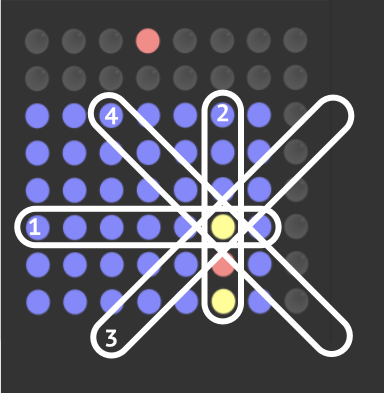

#### 11.1 ```check_horizontal(x,  y)```
La fonction ```check_horizontal(x, y)``` va faire une liste `horizontal` de tous les pixels de la rangée `y` où le jeton a été placé, puis va la comparer à `fourYellow` et `fourRed` par groupe de quatre pixels, quatre fois de suite afin de couvrir l'entièreté de la rangée.<br/>
Si l'une des conditions est remplie, le joueur `p` qui a posé le jeton recevra un point à travers la fonction `player_scored(p)`, et la fonction retournera `True`. Sinon, la fonction retournera `False`. 

In [ ]:
def check_horizontal(x, y):
    """
    Checks if there is four same-colored tokens in the same row.

    x is the last played token's column
    y is the last played token's row

    Returns False if there isn't four same-colored tokens on the same row.
    Returns True if there are, and calls player_scored(p) for the appropriate
    player based on color (RED == p1, YELLOW == p2)
    """
    # Makes a list out of the row
    horizontal = sense.get_pixels()[8 * y:8 * y + 7]
    for z in range(4):  # Checks the row by four groups of four tokens
        if horizontal[z:z + 4] == fourYellow:  # Is there four yellow tokens?
            player_scored(2)  # If yes, p2 scored
            return True  # Returns that there was a winning move
        if horizontal[z:z + 4] == fourRed:  # Is there four red tokens?
            player_scored(1)  # If yes, p1 scored
            return True  # Returns that there was a winning move.
    return False  # Returns that there were no winning move.

#### 11.2 ```check_vertical(x,  y)```
La fonction ```check_vertical(x, y)``` va faire une liste `vertical` de tous les pixels de la colonne `x` où le jeton a été placé, puis va la comparer à `fourYellow` et `fourRed` par groupe de quatre pixels, trois fois de suite afin de couvrir l'entièreté de la colonne.<br/>
Si l'une des conditions est remplie, le joueur `p` qui a posé le jeton recevra un point à travers la fonction `player_scored(p)`, et la fonction retournera `True`. Sinon, la fonction retournera `False`. 

In [ ]:
def check_vertical(x, y):
    """
    Checks if there is four same-colored tokens in the same column.

    x is the last played token's column
    y is the last played token's row

    Returns False if there isn't four same-colored tokens in the column.
    Returns True if there are, and calls player_scored(p) for the appropriate
    player based on color (RED == p1, YELLOW == p2)
    """
    # Makes a list out of the column
    vertical = [sense.get_pixel(x, 2), sense.get_pixel(x, 3),
                sense.get_pixel(x, 4), sense.get_pixel(x, 5),
                sense.get_pixel(x, 6), sense.get_pixel(x, 7)]
    for z in range(3):  # Checks the column by three groups of four tokens
        if vertical[z:z + 4] == fourYellow:  # Is there four yellow tokens?
            player_scored(2)  # If yes, p2 scored
            return True  # Returns that there was a winning move
        if vertical[z:z + 4] == fourRed:  # Is there four red tokens?
            player_scored(1)  # If yes, p1 scored
            return True  # Returns that there was a winning move
    return False  # Returns that there were no winning move

#### 11.3 ```check_diagonal_downleft_upright(x,  y)```
La fonction ```check_diagonal_downleft_upright(x, y)``` va faire une liste `diagonal` de tous les pixels de la diagonale allant d'en bas à gauche à en haut à droite en passant par le point `x, y` où le jeton a été placé grâce à la fonction ```create_diagonal_downleft_upright(diagonal, x, y)```, puis va la comparer à `fourYellow` et `fourRed` par groupe de quatre pixels, quatre fois de suite afin de couvrir l'entièreté de la rangée.<br/>
Si l'une des conditions est remplie, le joueur `p` qui a posé le jeton recevra un point à travers la fonction `player_scored(p)`, et la fonction retournera `True`. Sinon, la fonction retournera `False`. 

In [ ]:
def check_diagonal_downleft_upright(x, y):
    """
    Checks if there is four same-colored token in the bottom-left to
    upper-right diagonal.

    x is the last played token's column
    y is the last played token's row

    Calls create_diagonal_downleft_upright to create a list from the diagonal.

    Returns False if there isn't four same-colored tokens in the diagonal.
    Returns True if there are, and calls player_scored(p) for the appropriate
    player based on color (RED == p1, YELLOW == p2)
    """
    diagonal = []  # Resets the list
    # Calls a function to create a list from the pixels in a bottom-left to
    # upper-right diagonal
    create_diagonal_downleft_upright(diagonal, x, y)
    for z in range(4):  # Checks the diagonal by four groups of four tokens
        if diagonal[z:z + 4] == fourYellow:  # Is there four yellow tokens?
            player_scored(2)  # If yes, p2 scored
            return True  # Returns that there was a winning move
        if diagonal[z:z + 4] == fourRed:  # Is there four red tokens?
            player_scored(1)  # If yes, p1 scored
            return True  # Returns that there was a winning move
    return False  # Returns that there were no winning move

##### 11.3.1 ```create_diagonal_downleft_upright(diagonal, x, y)```
En utilisant `try` et `except`, la fonction ```create_diagonal_downleft_upright(diagonal, x, y)``` tente de créer une liste de 7 pixels passant en diagonale du point `x, y` d'en bas à gauche à en haut à droite.<br/>
L'utilisation de `try` et `except` permet d'éviter que le programme crashe lorsque la fonction tente d'ajouter un pixel hors limites à la liste. <br/><br/>
La fonction retourne la liste `diagonale` aussi grande que ce qu'elle a pu obtenir. 

In [ ]:
def create_diagonal_downleft_upright(diagonal, x, y):
    """
    Creates a list of seven pixels in a bottom left to upper right diagonal
    centered around the last placed token.

    diagonal is the list
    x is the last played token's column
    y is the last played token's row

    As the function might try to take into account pixels that are out of
    bounds, there is a try except ValueError in order to prevent out of bounds
    errors. The list might be shorter than seven pixels, but the function works
    anyway.

    Returns the list of diagonal pixels.
    """
    for z in range(7):  # To have a 7 pixel list
        # Tries to get values that might be out of bounds, three pixels down
        # left and three pixels up right in a diagonal from the token
        try:
            diagonal.append(sense.get_pixel(x - z + 3, y + z - 3))
        except:  # Catches out of bounds errors
            ValueError
    return(diagonal)  # Returns the list of pixels

#### 11.4 ```check_diagonal_downright_upleft(x,  y)```
La fonction ```check_diagonal_downright_upleft(x, y)``` va faire une liste `diagonal` de tous les pixels de la diagonale allant d'en bas à droite à en haut à gauche en passant par le point `x, y` où le jeton a été placé grâce à la fonction ```create_diagonal_downright_upleft(diagonal, x, y)```, puis va la comparer à `fourYellow` et `fourRed` par groupe de quatre pixels, quatre fois de suite afin de couvrir l'entièreté de la rangée.<br/>
Si l'une des conditions est remplie, le joueur `p` qui a posé le jeton recevra un point à travers la fonction `player_scored(p)`, et la fonction retournera `True`. Sinon, la fonction retournera `False`. 

In [ ]:
def check_diagonal_downright_upleft(x, y):
    """
    Checks if there is four same-colored token in the bottom-right to
    upper-left diagonal.

    x is the last played token's column
    y is the last played token's row

    Calls create_diagonal_downright_upleft to create a list from the diagonal.

    Returns False if there isn't four same-colored tokens in the diagonal.
    Returns True if there are, and calls player_scored(p) for the appropriate
    player based on color (RED == p1, YELLOW == p2)
    """
    diagonal = []  # Resets the list
    # Calls a function to create a list from the pixels in a bottom-right to
    # upper-left diagonal
    create_diagonal_downright_upleft(diagonal, x, y)
    for z in range(4):  # Checks the diagonal by four groups of four tokens
        if diagonal[z:z + 4] == fourYellow:  # Is there four yellow tokens?
            player_scored(2)  # If yes, p2 scored
            return True  # Returns that there was a winning move
        if diagonal[z:z + 4] == fourRed:  # Is there four red tokens?
            player_scored(1)  # If yes, p1 scored
            return True  # Returns that there was a winning move
    return False  # Returns that there were no winning move

##### 11.4.1 ```create_diagonal_downright_upleft(diagonal, x, y)```
En utilisant `try` et `except`, la fonction ```create_diagonal_downright_upleft(diagonal, x, y)``` tente de créer une liste de 7 pixels passant en diagonale du point `x, y` d'en bas à droite à en haut à gauche.<br/>
L'utilisation de `try` et `except` permet d'éviter que le programme crashe lorsque la fonction tente d'ajouter un pixel hors limites à la liste.<br/>
<br/>
La fonction retourne la liste `diagonale` aussi grande que ce qu'elle a pu obtenir. 

In [ ]:
def create_diagonal_downright_upleft(diagonal, x, y):
    """
    Creates a list of seven pixels in a bottom right to upper left diagonal
    centered around the last placed token.

    diagonal is the list
    x is the last played token's column
    y is the last played token's row

    As the function might try to take into account pixels that are out of
    bounds, there is a try except ValueError in order to prevent out of bounds
    errors. The list might be shorter than seven pixels, but the function works
    anyway.

    Returns the list of diagonal pixels.
    """
    for z in range(7):  # To have a 7 pixel list
        # Tries to get values that might be out of bounds, three pixels down
        # right and three pixels up left in a diagonal from the token
        try:
            diagonal.append(sense.get_pixel(x - z + 3, y - z + 3))
        except:  # Catches out of bounds errors
            ValueError
    return(diagonal)  # Returns the list of pixels

### 12. Module ou Standalone?
Ce morceau de code fait en sorte que le jeu se répète s'il est standalone `repeat = 1` mais pas s'il est importé comme module `repeat = 0` afin de permettre de retourner à la sélection de jeux.

In [ ]:
#  Execute the main() function when the file is executed,
#  but do not execute when the module is imported as a module.
print('module name =', __name__)

if __name__ == '__main__':
    main()
    global repeat
    repeat = 1  # If the game is played as standalone, make it repeat
else:
    global repeat
    repeat = 0  # If the game is played as a module, make it quit when over